In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
tr_dp = '/content/drive/MyDrive/ML/mnist_train.csv'
ts_dp = '/content/drive/MyDrive/ML/mnist_test.csv'

In [ ]:
d_tr = pd.read_csv(tr_dp)
d_ts = pd.read_csv(ts_dp)

In [ ]:
print(" Here is the sample data for both the datasets (training and testing )")
print("\n TRAINING DATA SET\n")
print(d_tr.head(10))
print("\n TEST DATA SET\n")
print(d_ts.head(10))

 Here is the sample data for both the datasets (training and testing )

 TRAINING DATA SET

   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   
5      2    0    0    0    0    0    0    0    0    0  ...      0      0   
6      1    0    0    0    0    0    0    0    0    0  ...      0      0   
7      3    0    0    0    0    0    0    0    0    0  ...      0      0   
8      1    0    0    0    0    0    0    0    0    0  ...      0      0   
9      4    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0   

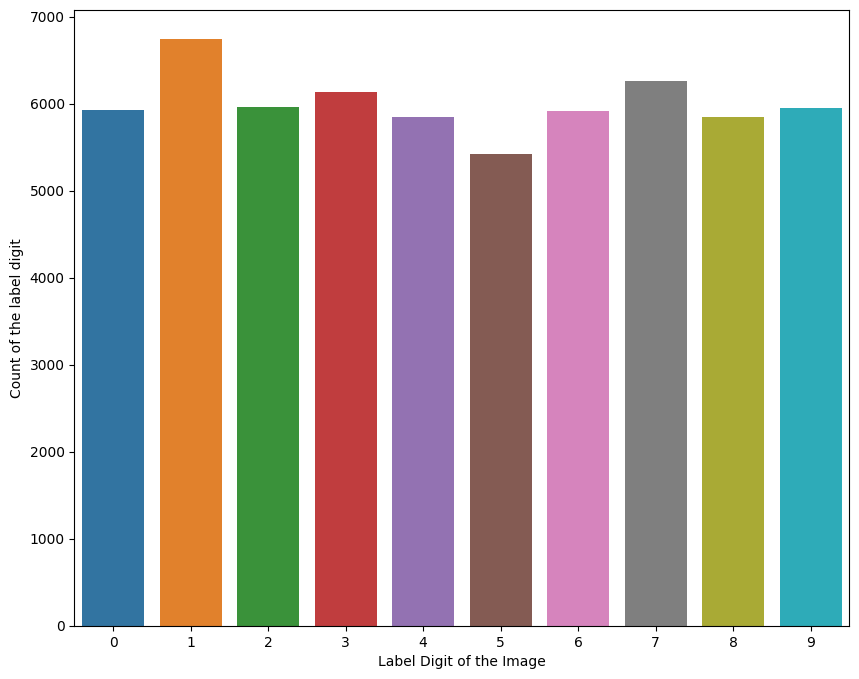

In [ ]:
# This code is used to check the occurences of different labels in training dataset
import seaborn as sns
plt.figure(figsize = (10,8))
sns.countplot(x = 'label', data = d_tr)
plt.xlabel("Label Digit of the Image")
plt.ylabel("Count of the label digit")
plt.show()

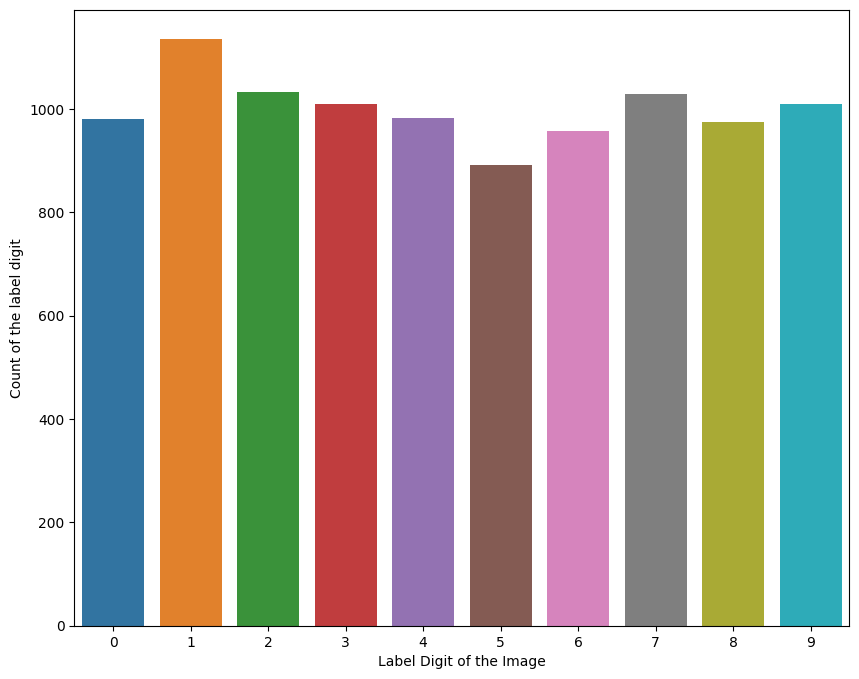

In [ ]:
import seaborn as sns
plt.figure(figsize = (10,8))
sns.countplot(x = 'label', data = d_ts)
plt.xlabel("Label Digit of the Image")
plt.ylabel("Count of the label digit")
plt.show()

In [ ]:
d_tr= d_tr.drop(columns=['label'])
d_tr.describe()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


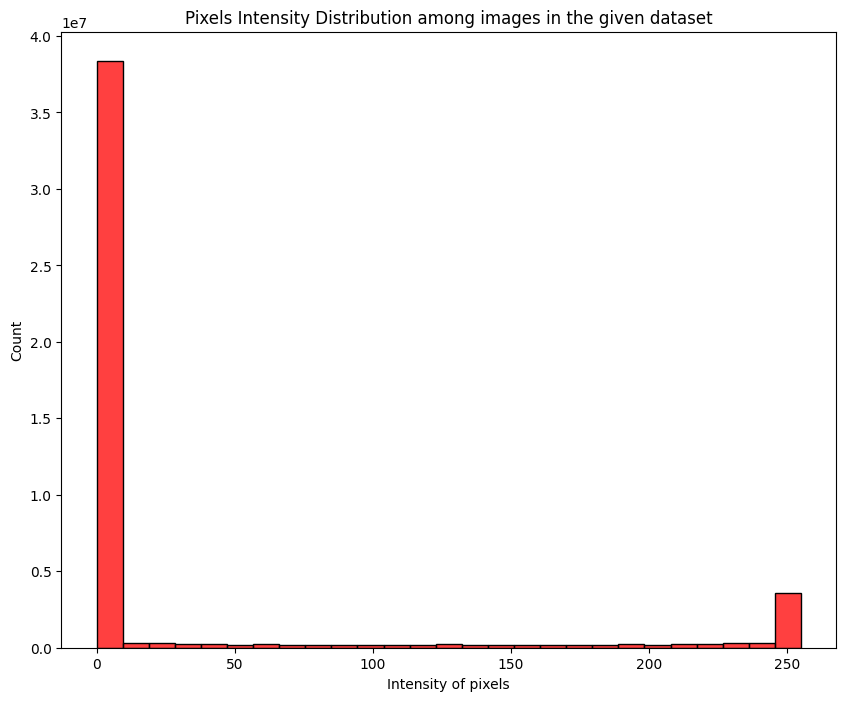

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# d_tr = d_tr.drop(columns=['label'])
B = d_tr.values
pixels= B.reshape(-1)
plt.figure(figsize = (10,8))
sns.histplot(pixels, kde= False, color= "red")
plt.title('Pixels Intensity Distribution among images in the given dataset')
plt.xlabel('Intensity of pixels')
plt.ylabel('Count')
plt.show()

<Axes: >

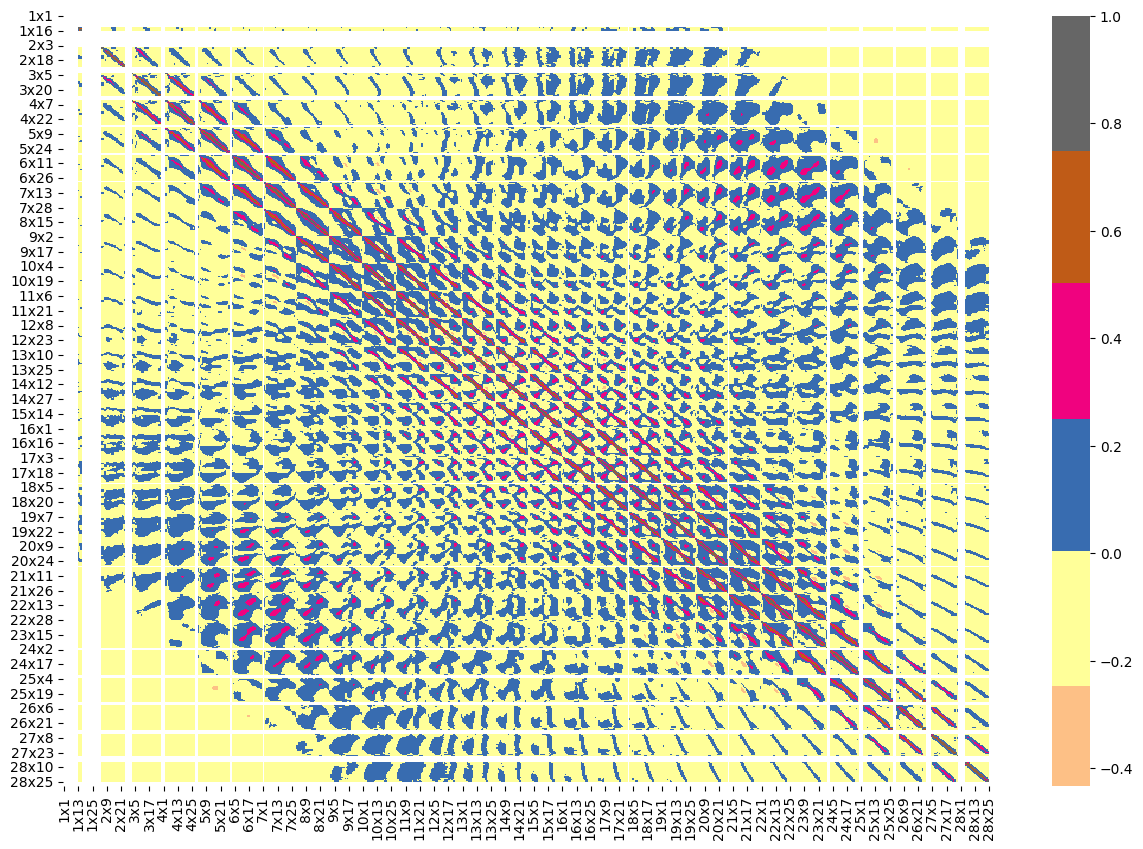

In [ ]:
corr_mat = d_tr.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr_mat, cmap = 'Accent', center = 0)

In [ ]:
# Here we are converting the dataframes into the  numpy arrays
# for the process of clustering (so as to store image in a single 1D array)
d_tr = pd.read_csv(tr_dp)
d_ts = pd.read_csv(ts_dp)
X = d_tr.values
Y = d_ts.values.astype(int)

In [ ]:
# In this step we are initializing the centroids of the clusters
# randomly from the given dataset and then we will update them accordingly
k_clust = int(input("Enter the desired number of clusters you want:- "))
print(f"You wish to obtain {k_clust} clusters")
mu_k0 = np.random.rand(k_clust,X.shape[1]) #The first mean points



Enter the desired number of clusters you want:- 10
You wish to obtain 10 clusters


In [ ]:
#In order to assign each data point a cluster, we need distance measure
#defining the similarity measures, in our case, its cosine measure
#which is our similarity measure.
def sim_meas(v1, v2):
    nv1,nv2 = np.linalg.norm(v1),np.linalg.norm(v2)
    dp = np.dot(v1, v2)
    dist = dp/ (nv1 * nv2)
    return dist


In [ ]:
distance = np.zeros((X.shape[0],k_clust))
print(np.shape(distance))
mu_ki = np.zeros((k_clust,X.shape[1]))
if (np.linalg.norm(mu_k0-mu_ki).all()>0.001): # We are checking for the convergence of means of the clusters
  for t in range(150): # Here we are giving the upper bound to the number of iterations as 100
# Here we are now iterating over the number of clusters
    for i  in range(k_clust):
      for j in range(X.shape[0]): # iterating over the number of data points in our dataset
        distance[j,i] = 1- sim_meas(X[j],mu_k0[i])
# After computing the distances from data point and means, now we allot the clusters to the data points
# It is E step for EM algorithm
  allot_clusters = np.argmin(distance, axis=1)
# updating the means of the clusters
# It is M step for EM algorithm
  for i in range(k_clust):
     in_C = X[allot_clusters == i]
     if(len(in_C)) >0 :
         mu_ki = np.mean(in_C, axis = 0)
else:
  mu_k0 = mu_ki

(60000, 10)


KeyboardInterrupt: ignored

In [ ]:
#In this step, we are printing the data points assigned in their respective clusters using their indices
for cl_ind in range(k_clust) :
  data_point_number = np.where(allot_clusters == cl_ind)[0]
  print(f'Cluster number {cl_ind} contains the following data point having their indices :\n {data_point_number} ')

Cluster number 0 contains the following data point having their indices :
 [   16    28    32 ... 59955 59967 59971] 
Cluster number 1 contains the following data point having their indices :
 [    1     5    17 ... 59992 59995 59998] 
Cluster number 2 contains the following data point having their indices :
 [   64   156   196 ... 59765 59817 59983] 
Cluster number 3 contains the following data point having their indices :
 [    2     4     7 ... 59974 59981 59985] 
Cluster number 4 contains the following data point having their indices :
 [   90   145   178   432   510   597   843   892   902   936   973  1021
  1034  1039  1113  1175  1191  1222  1341  1478  1494  1551  1559  1587
  1658  1661  1662  1699  1703  1716  1795  1807  1888  1890  2083  2108
  2401  2530  2580  2692  2892  2988  2999  3141  3156  3177  3201  3220
  3221  3295  3301  3362  3428  3479  3763  3859  3907  4003  4116  4325
  4359  4390  4411  4414  4428  4453  4461  4524  4651  4654  5003  5095
  5135  5158  5

Now using this code, you can enter index of any data point and it will show the image corresponding to that datapoint

Enter the index for required datapoint you want to see image:- 56565


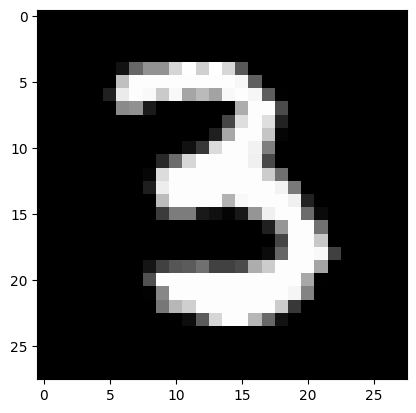

In [ ]:
print("Now using this code, you can enter index of any data point and it will show the image corresponding to that datapoint")
point = int(input("\nEnter the index for required datapoint you want to see image:- "))
import matplotlib.pyplot as plt
plt.imshow(X[point][1:,].reshape(28,28),cmap='gray' )


 Cluster 0 has 8891 number of data points in it and the clusters so formed are shown below:- 


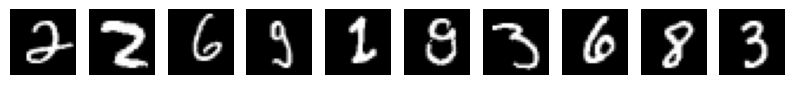

 Cluster 1 has 9232 number of data points in it and the clusters so formed are shown below:- 


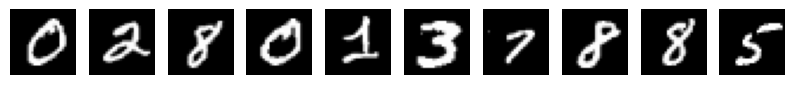

 Cluster 2 has 2171 number of data points in it and the clusters so formed are shown below:- 


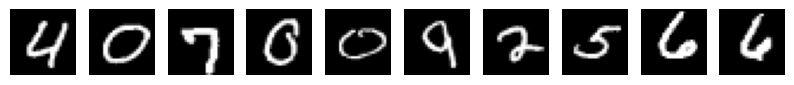

 Cluster 3 has 15393 number of data points in it and the clusters so formed are shown below:- 


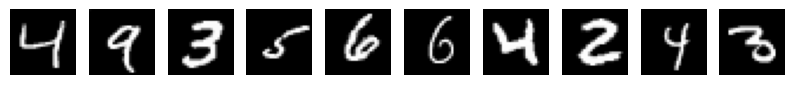

 Cluster 4 has 895 number of data points in it and the clusters so formed are shown below:- 


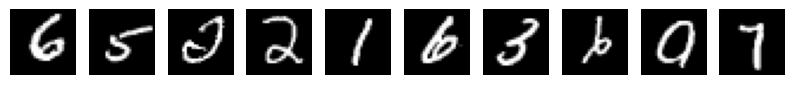

 Cluster 5 has 8563 number of data points in it and the clusters so formed are shown below:- 


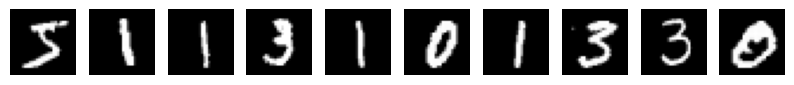

 Cluster 6 has 2389 number of data points in it and the clusters so formed are shown below:- 


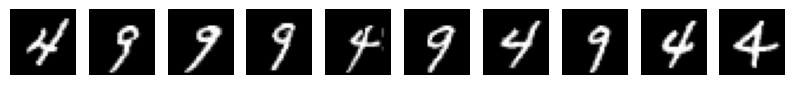

 Cluster 7 has 1526 number of data points in it and the clusters so formed are shown below:- 


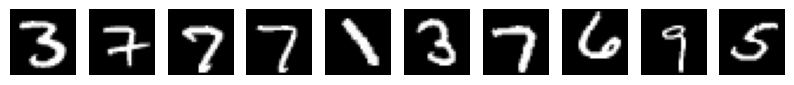

 Cluster 8 has 8423 number of data points in it and the clusters so formed are shown below:- 


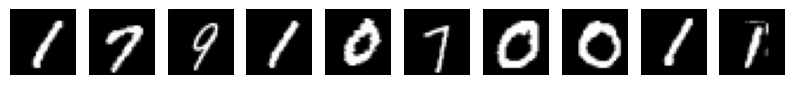

 Cluster 9 has 2517 number of data points in it and the clusters so formed are shown below:- 


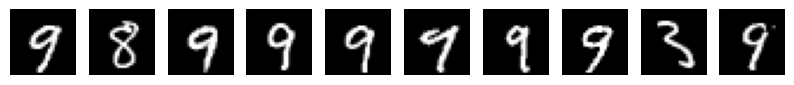

In [ ]:
import matplotlib.pyplot as plot
#Visualisation of the clusters
for kth_clust in range(k_clust):
    print(f" Cluster {kth_clust} has {np.sum(allot_clusters==kth_clust)} number of data points in it and the clusters so formed are shown below:- ")
    sample_in_clust = X[allot_clusters == kth_clust]
    sum_sample = sample_in_clust.shape[0]
    plot.figure(figsize=(10,10))
    for i in range(min(10,sum_sample)):
        plot.subplot(1,10,i+1)
        plot.imshow(sample_in_clust[i][:-1].reshape(28,28), cmap = 'gray')
        plot.axis('off')
    plot.show()


**Bonus Question**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA as pca

In [ ]:
# Here we are fetching the datasets again
d_tr = pd.read_csv(tr_dp)
d_ts = pd.read_csv(ts_dp)
d_tr= d_tr.drop(columns=['label'])
X = d_tr

In [ ]:
# Here we will apply PCA for dimension Reduction
num_cpt = int(input("Enter the number of components you want to take for PCA:- "))
print("\n")
print(f'Performing PCA with {num_cpt}')
red_X = pca(n_components = num_cpt)
trans_X = red_X.fit_transform(X)
err=[]
for i in range(1,11):
    kmc= KMeans(n_clusters =i)
    kmc.fit(trans_X)
    err.append(kmc.inertia_)

Enter the number of components you want to take for PCA:- 64


Performing PCA with 64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'Finding Optimal Number of clusters using Elbow Method')

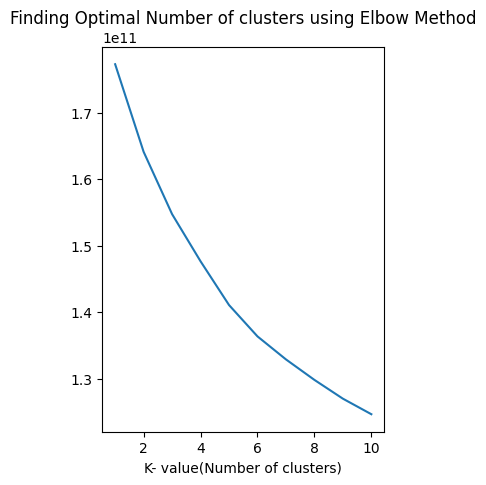

In [ ]:
# Plotting the elow curve to find the optimal number of clusters
plt.figure(figsize = (8,5))
plt.subplot(1,2,1)
plt.plot(range(1,11), err, linestyle= '-')
plt.xlabel( 'K- value(Number of clusters)')
plt.title('Finding Optimal Number of clusters using Elbow Method')

